# Grover experiment for N=3 qubits

#### We dismantle here a Grover circuit to see what is going on inside it.

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library import DiagonalGate
import matplotlib.pyplot as plt
import numpy as np
import math as mt
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library import DiagonalGate
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector

#### At this point we start using Statevector function that clarify our state throught all steps of Grover algorithm

In [2]:
cr = ClassicalRegister(3)
qr2 = QuantumRegister(3)
qc2 = QuantumCircuit(qr2, cr)
qc2.h([0,1,2])
state = Statevector.from_instruction(qc2)
print("First part:")
print(state)
print(np.abs(state.data**2))
qc2.barrier([0,1,2])
qc2.append(DiagonalGate([1, -1, 1, 1,1,1,1,1]), [0, 1,2])
qc2.h([0,1,2])
state = Statevector.from_instruction(qc2)
print("Second part:")
print(state)
print(np.abs(state.data**2))
qc2.append(DiagonalGate([1, -1, -1, -1,-1,-1,-1,-1]), [0, 1,2])
qc2.h([0,1,2])
state = Statevector.from_instruction(qc2)
print("Final part:")
print(state)
print(np.abs(state.data**2))

First part:
Statevector([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j],
            dims=(2, 2, 2))
[0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
Second part:
Statevector([ 0.75+0.j,  0.25+0.j, -0.25+0.j,  0.25+0.j, -0.25+0.j,
              0.25+0.j, -0.25+0.j,  0.25+0.j],
            dims=(2, 2, 2))
[0.5625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625]
Final part:
Statevector([0.1767767 -9.81307787e-17j, 0.88388348-2.06074635e-16j,
             0.1767767 -5.88784672e-17j, 0.1767767 -2.94392336e-17j,
             0.1767767 -5.88784672e-17j, 0.1767767 -6.86915451e-17j,
             0.1767767 -7.85046229e-17j, 0.1767767 -2.94392336e-17j],
            dims=(2, 2, 2))
[0.03125 0.78125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125]


#### Now we make for these stages graphs, that show a probability of obtaining a certain state (we search state 001)

First part:
[0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]


Text(0.5, 0, 'States')

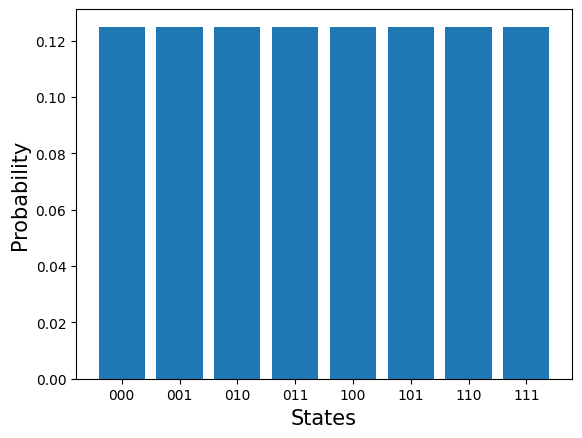

In [3]:
cr = ClassicalRegister(3)
qr2 = QuantumRegister(3)
qc2 = QuantumCircuit(qr2, cr)
qc2.h([0,1,2])
state = Statevector.from_instruction(qc2)
print("First part:")
y1 = (np.abs(state.data**2))
print(y1)
x1 = ['000', '001', '010', '011', '100', '101', '110', '111']
plt.bar(x1,y1)
plt.ylabel('Probability', size=15)
plt.xlabel('States', size =15)

Second part:
[0.5625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625]


Text(0.5, 0, 'States')

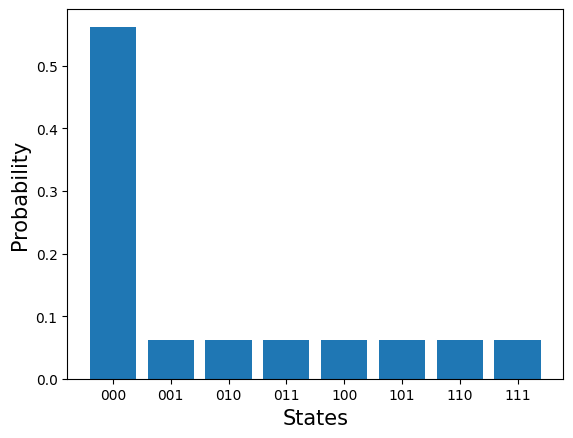

In [4]:
cr = ClassicalRegister(3)
qr2 = QuantumRegister(3)
qc2 = QuantumCircuit(qr2, cr)
qc2.h([0,1,2])
state = Statevector.from_instruction(qc2)
qc2.barrier([0,1,2])
qc2.append(DiagonalGate([1, -1, 1, 1,1,1,1,1]), [0, 1,2])
qc2.h([0,1,2])
state = Statevector.from_instruction(qc2)
print("Second part:")
y2 = (np.abs(state.data**2))
print(y2)
x1 = ['000', '001', '010', '011', '100', '101', '110', '111']
plt.bar(x1,y2)
plt.ylabel('Probability', size=15)
plt.xlabel('States', size=15)

Final part:
[0.03125 0.78125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125]


Text(0.5, 0, 'States')

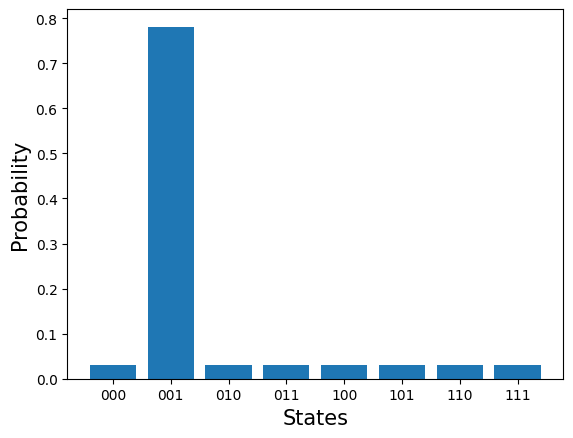

In [5]:
cr = ClassicalRegister(3)
qr2 = QuantumRegister(3)
qc2 = QuantumCircuit(qr2, cr)
qc2.h([0,1,2])
state = Statevector.from_instruction(qc2)
qc2.barrier([0,1,2])
qc2.append(DiagonalGate([1, -1, 1, 1,1,1,1,1]), [0, 1,2])
qc2.h([0,1,2])
state = Statevector.from_instruction(qc2)
qc2.append(DiagonalGate([1, -1, -1, -1,-1,-1,-1,-1]), [0, 1,2])
qc2.h([0,1,2])
state = Statevector.from_instruction(qc2)
print("Final part:")
y3 = (np.abs(state.data**2))
print(y3)
x1 = ['000', '001', '010', '011', '100', '101', '110', '111']
plt.bar(x1,y3)
plt.ylabel('Probability', size=15)
plt.xlabel('States', size=15)

#### One can compare Statevector method to standard measurement in Qiskit simulation

{'001': 800, '010': 31, '110': 30, '011': 36, '111': 39, '101': 33, '000': 36, '100': 19}


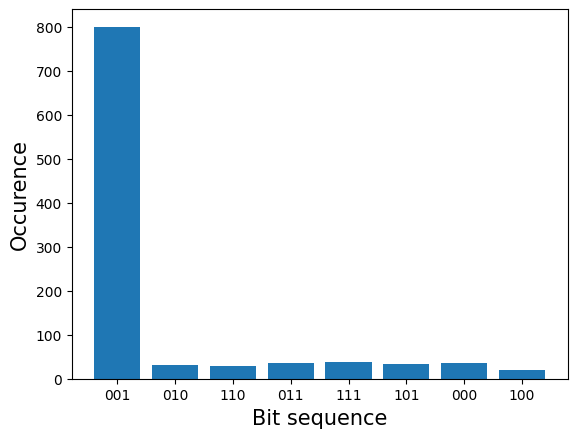

In [6]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library import DiagonalGate
from qiskit_aer import Aer
from qiskit import transpile

cr = ClassicalRegister(3)
qr1 = QuantumRegister(3)
qc1 = QuantumCircuit(qr1, cr)
qc1.h([0,1,2])
qc1.barrier([0,1,2])
qc1.append(DiagonalGate([1, -1, 1, 1,1,1,1,1]), [0, 1,2])
qc1.h([0,1,2])
qc1.append(DiagonalGate([1, -1, -1, -1,-1,-1,-1,-1]), [0, 1,2])
qc1.h([0,1,2])

qc1.barrier([0,1,2])
qc1.measure([0,1,2], cr)

backend = Aer.get_backend('aer_simulator')
job = backend.run([qc1])
results = job.result().get_counts()
print(results)
import matplotlib.pyplot as plt

x1 = list(results.keys())
y1 = list(results.values())
plt.bar(x1,y1)
plt.ylabel('Occurence', size=15)
plt.xlabel('Bit sequence', size=15)
plt.show()

#### This part is an insight into a relationship between following iterations and probability of obtaining a desired state.


Iteration 1:
[0.03125 0.78125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125]
Iters. done:[Current cost:0.781249999999999]
Iters. done: [Current cost:0.21875]

Iteration 2:
[0.0078125 0.9453125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125
 0.0078125]
Iters. done:[Current cost:0.945312499999997]
Iters. done: [Current cost:0.0546875]

Iteration 3:
[0.09570312 0.33007812 0.09570312 0.09570312 0.09570312 0.09570312
 0.09570312 0.09570312]
Iters. done:[Current cost:0.330078124999999]
Iters. done: [Current cost:0.669921874999999]

Iteration 4:
[0.14111328 0.01220703 0.14111328 0.14111328 0.14111328 0.14111328
 0.14111328 0.14111328]
Iters. done:[Current cost:0.01220703125]
Iters. done: [Current cost:0.987792968749993]

Iteration 5:
[0.0645752  0.54797363 0.0645752  0.0645752  0.0645752  0.0645752
 0.0645752  0.0645752 ]
Iters. done:[Current cost:0.547973632812496]
Iters. done: [Current cost:0.452026367187499]

Iteration 6:
[3.05175781e-05 9.99786377e-01 3.05175781e-05 3.05175781e-05
 

([<matplotlib.axis.XTick at 0x2d555edc2d0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

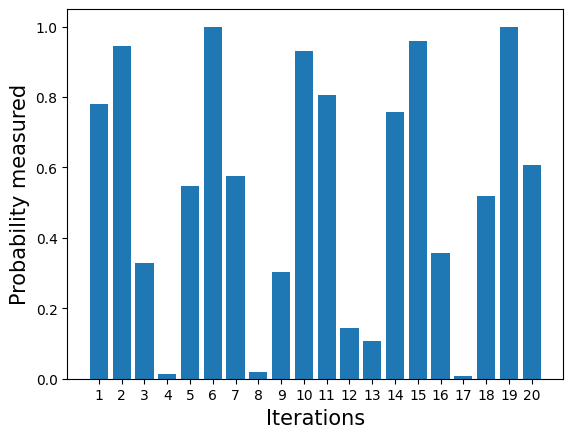

In [24]:
cost_history_dict0 = {"cost_history": []}
cost_history_dict1 = {"cost_history": []}
qc3 = QuantumCircuit(3)
qc3.h([0,1,2])

for i in range(0,20):
    qc3.barrier([0,1,2])
    qc3.append(DiagonalGate([1, -1, 1, 1,1,1,1,1]), [0, 1,2])
    qc3.h([0,1,2])
    qc3.append(DiagonalGate([1, -1, -1, -1,-1,-1,-1,-1]), [0, 1,2])
    qc3.h([0,1,2])
    state = Statevector.from_instruction(qc3)
    print(f"\nIteration {i+1}:")
    result = np.round(abs(state.data)**2, 15)
    print(result)
    aim = result[1]
    not_aim = result[0] + result[2] + result[3] + result[4] +  result[5] + result[6] + result[7]
    cost_history_dict0["cost_history"].append(aim)
    cost_history_dict1["cost_history"].append(not_aim)
    print(f"Iters. done:[Current cost:{aim}]")
    print(f"Iters. done: [Current cost:{not_aim}]")

y11 = list(cost_history_dict0.values())
converted = [[float(x) for x in row] for row in y11]
y1 = converted[0]
print(y1)

y22 = list(cost_history_dict1.values())
converted2 = [[float(x) for x in row] for row in y22]
y2 = converted2[0]
print(y2)

x1 = []
for i in range(0,20):
    a = 1
    a += i
    x1.append(a)

plt.bar(x1,y1)
plt.ylabel('Probability measured', size=15)
plt.xlabel('Iterations' , size=15)
plt.xticks(np.arange(min(x1), max(x1) + 1, 1))


#### We calculated this probability mathematically as well

1.721441469079183


([<matplotlib.axis.XTick at 0x2d555be0b90>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

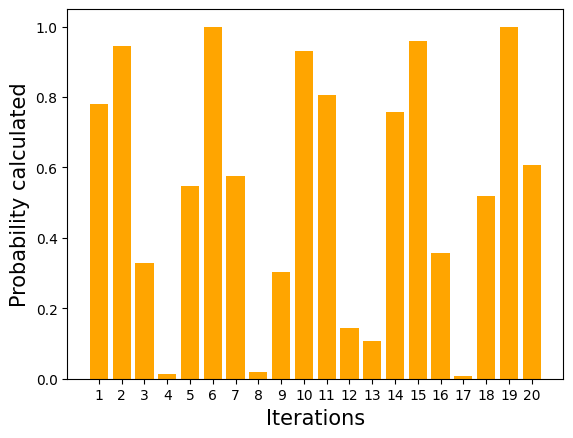

In [25]:
number_qubits = 2**3 
number_solutions = 1 
k_opt = (np.pi / 4) * np.sqrt(number_qubits / number_solutions) - 1/2 
print(k_opt)

y2 = []
for i in range(1,21):
    prob = (np.sin((2*i + 1)*mt.acos(np.sqrt((8 - 1) / 8))))**2
    y2.append(prob)

plt.bar(x1,y2, color='orange')
plt.ylabel('Probability calculated', size=15)
plt.xlabel('Iterations', size=15)
plt.xticks(np.arange(min(x1), max(x1) + 1, 1))